In [463]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.impute import KNNImputer
from scipy.stats.mstats import winsorize
import seaborn as sns
import statsmodels.api as sm


In [349]:
df = pd.read_csv("./Life Expectancy Data.csv")

In [350]:
# create world map
import plotly.express as px
# sort year values
data = df.sort_values(by=['Year'])
fig = px.choropleth(data, locations="Country", locationmode='country names', color="Life expectancy ", hover_name="Country", animation_frame="Year" ,)
fig.show()


# Exploration

In [460]:
df.shape

(2909, 22)

In [461]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2909.00,2909.00,2909.00,2909.00,2728.00,2909.00,2375.00,2909.00,2888.00,2909.00,2909.00,2694.00,2909.00,2909.00,2474.00,2265.00,2888.00,2888.00,2749.00,2749.00
mean,2007.52,69.29,164.09,30.50,4.63,744.65,80.96,2443.71,38.22,42.28,82.55,5.93,82.32,1.74,7521.94,12851504.57,4.85,4.88,0.63,12.07
std,4.61,9.49,124.00,118.49,4.05,1996.66,25.02,11521.75,19.96,161.21,23.42,2.48,23.71,5.10,14307.71,61285041.67,4.42,4.51,0.21,3.23
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,34.00,0.10,0.10,0.00,0.00
25%,2004.00,63.30,73.00,0.00,0.93,5.14,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,464.45,198954.00,1.60,1.50,0.49,10.20
50%,2008.00,72.10,144.00,3.00,3.79,67.33,92.00,18.00,43.25,4.00,93.00,5.74,93.00,0.10,1774.63,1412669.00,3.35,3.40,0.68,12.40
75%,2012.00,75.70,226.00,22.00,7.73,445.44,97.00,372.00,56.10,27.00,97.00,7.48,97.00,0.80,5955.14,7444443.00,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,77.60,2500.00,99.00,17.60,99.00,50.60,119172.74,1293859294.00,27.70,28.60,0.95,20.70


In [351]:
# print the header 
print(tabulate(df.head(), headers='keys', tablefmt='psql'))

+----+-------------+--------+------------+--------------------+-------------------+-----------------+-----------+--------------------------+---------------+------------+---------+----------------------+---------+---------------------+---------------+-------------+----------+------------------+-------------------------+-----------------------+-----------------------------------+-------------+
|    | Country     |   Year | Status     |   Life expectancy  |   Adult Mortality |   infant deaths |   Alcohol |   percentage expenditure |   Hepatitis B |   Measles  |    BMI  |   under-five deaths  |   Polio |   Total expenditure |   Diphtheria  |    HIV/AIDS |      GDP |       Population |    thinness  1-19 years |    thinness 5-9 years |   Income composition of resources |   Schooling |
|----+-------------+--------+------------+--------------------+-------------------+-----------------+-----------+--------------------------+---------------+------------+---------+----------------------+--------

In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2909 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2909 non-null   object 
 1   Year                             2909 non-null   int64  
 2   Status                           2909 non-null   object 
 3   Life expectancy                  2909 non-null   float64
 4   Adult Mortality                  2909 non-null   float64
 5   infant deaths                    2909 non-null   int64  
 6   Alcohol                          2728 non-null   float64
 7   percentage expenditure           2909 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2909 non-null   int64  
 10   BMI                             2888 non-null   float64
 11  under-five deaths                2909 non-null   int64  
 12  Polio               

In [352]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2286.00,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,12753375.12,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,61012096.51,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,34.00,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,195793.25,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.75,64.91,92.00,17.00,43.50,4.00,93.00,5.75,93.00,0.10,1766.95,1386542.00,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7420359.00,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1293859294.00,27.70,28.60,0.95,20.70


# Data cleaning  

In [353]:
# find missing values in percentage
missing_values = df.isnull().sum()*100/len(df)
print(missing_values)


Country                            0.00
Year                               0.00
Status                             0.00
Life expectancy                    0.34
Adult Mortality                    0.34
infant deaths                      0.00
Alcohol                            6.60
percentage expenditure             0.00
Hepatitis B                       18.82
Measles                            0.00
 BMI                               1.16
under-five deaths                  0.00
Polio                              0.65
Total expenditure                  7.69
Diphtheria                         0.65
 HIV/AIDS                          0.00
GDP                               15.25
Population                        22.19
 thinness  1-19 years              1.16
 thinness 5-9 years                1.16
Income composition of resources    5.68
Schooling                          5.55
dtype: float64


We will drop the rows that have below 1 percent values 

In [354]:
# drop rows with null values in Life expectancy
df = df.dropna(subset=['Life expectancy '])

In [355]:
# drop rows with null values in Adult Mortality
df = df.dropna(subset=['Adult Mortality'])


In [356]:
# drop rows with null values in Diphtheria
df = df.dropna(subset=['Diphtheria '])

In [357]:
# drop rows with null values in Polio
df = df.dropna(subset=['Polio'])

In [358]:
# find type of data
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

for all the variables we would use sklearn machine learning algorithm to find the best way to impute the values

We will create a dataset with variables with only missing values 


In [359]:
# create a new dataframe without country and status
cleaning_data = df.drop(['Country', 'Status'], axis=1)

In [360]:
imputer = KNNImputer(n_neighbors=2)

In [361]:
imputer.fit(cleaning_data)

KNNImputer(n_neighbors=2)

In [362]:
X_imputed = imputer.transform(cleaning_data)


In [363]:
# convert array to dataframe
new_data = pd.DataFrame(X_imputed, columns = cleaning_data.columns)

In [364]:
new_data.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

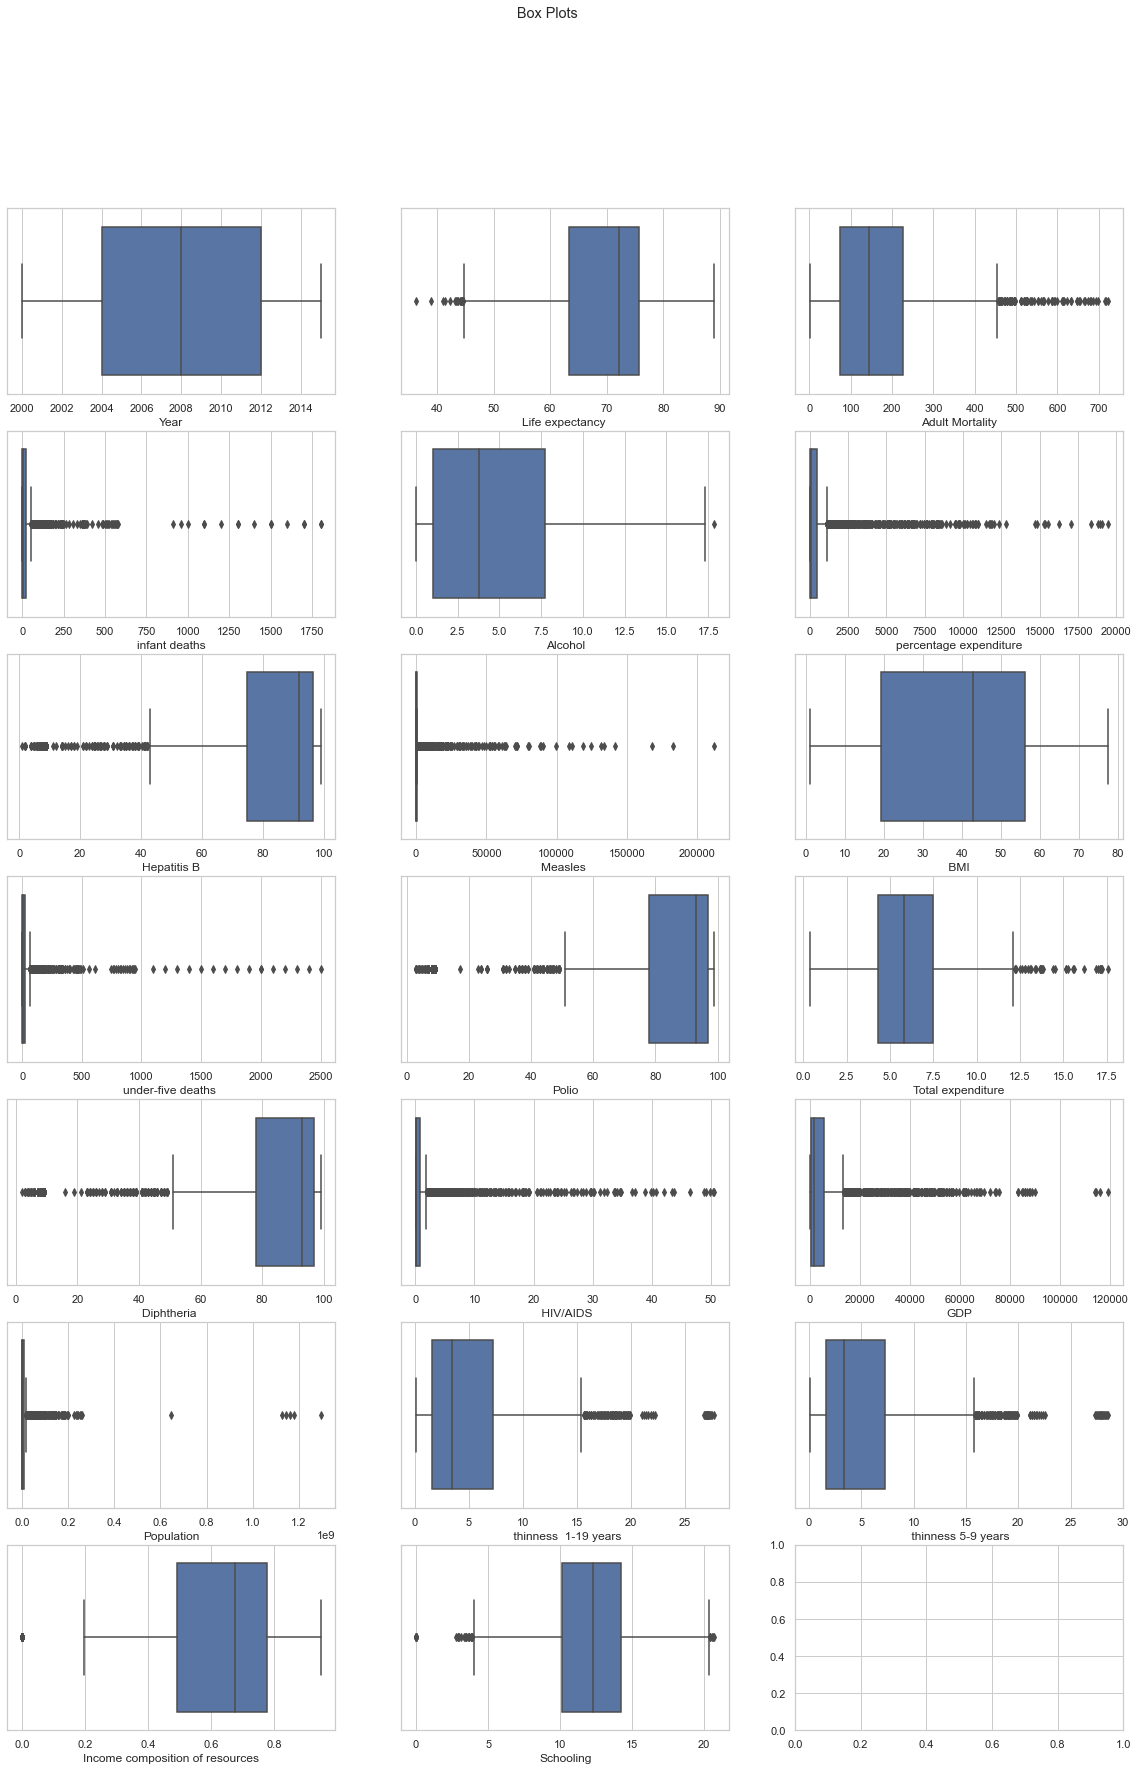

In [365]:
# create fancy box plots for all the variables
fig, axes = plt.subplots(7, 3, figsize=(20, 28))
fig.suptitle('Box Plots')
sns.boxplot(ax=axes[0, 0], data=new_data, x='Year')
sns.boxplot(ax=axes[0, 1], data=new_data, x='Life expectancy ')
sns.boxplot(ax=axes[0, 2], data=new_data, x='Adult Mortality')


sns.boxplot(ax=axes[1, 0], data=new_data, x='infant deaths')
sns.boxplot(ax=axes[1, 1], data=new_data, x='Alcohol')
sns.boxplot(ax=axes[1, 2], data=new_data, x='percentage expenditure')


sns.boxplot(ax=axes[2, 0], data=new_data, x='Hepatitis B')
sns.boxplot(ax=axes[2, 1], data=new_data, x='Measles ')
sns.boxplot(ax=axes[2, 2], data=new_data, x=' BMI ')

sns.boxplot(ax=axes[3, 0], data=new_data, x='under-five deaths ')
sns.boxplot(ax=axes[3, 1], data=new_data, x='Polio')
sns.boxplot(ax=axes[3, 2], data=new_data, x='Total expenditure')


sns.boxplot(ax=axes[4, 0], data=new_data, x='Diphtheria ')
sns.boxplot(ax=axes[4, 1], data=new_data, x=' HIV/AIDS')
sns.boxplot(ax=axes[4, 2], data=new_data, x='GDP')


sns.boxplot(ax=axes[5, 0], data=new_data, x='Population')
sns.boxplot(ax=axes[5, 1], data=new_data, x=' thinness  1-19 years')
sns.boxplot(ax=axes[5, 2], data=new_data, x=' thinness 5-9 years')

sns.boxplot(ax=axes[6, 0], data=new_data, x='Income composition of resources')
sns.boxplot(ax=axes[6, 1], data=new_data, x='Schooling')


# show
plt.show()


The Winsorizing approach proposed by Tukey & McLaughlin (1963) is suggested in this project to handle the outliers. 

In [366]:

def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

In [367]:
new_data.skew(axis = 0, numeric_only=True)

Year                              -0.01
Life expectancy                   -0.65
Adult Mortality                    1.19
infant deaths                      9.74
Alcohol                            0.58
percentage expenditure             4.63
Hepatitis B                       -1.85
Measles                            9.39
 BMI                              -0.22
under-five deaths                  9.45
Polio                             -2.10
Total expenditure                  0.62
Diphtheria                        -2.07
 HIV/AIDS                          5.38
GDP                                3.42
Population                        16.81
 thinness  1-19 years              1.70
 thinness 5-9 years                1.76
Income composition of resources   -1.08
Schooling                         -0.40
dtype: float64

                                            Correlation 

Schooling                         0.76
Income composition of resources   0.73
Adult Mortality                   0.69
 BMI                              0.57
 HIV/AIDS                         0.56
Diphtheria                        0.48
 thinness  1-19 years             0.48
 thinness 5-9 years               0.47
Polio                             0.47
GDP                               0.45
Alcohol                           0.42
percentage expenditure            0.38
Hepatitis B                       0.29
Total expenditure                 0.23
under-five deaths                 0.22
infant deaths                     0.20
Year                              0.17
Measles                           0.16
Population                        0.04
Name: Life expectancy , dtype: float64

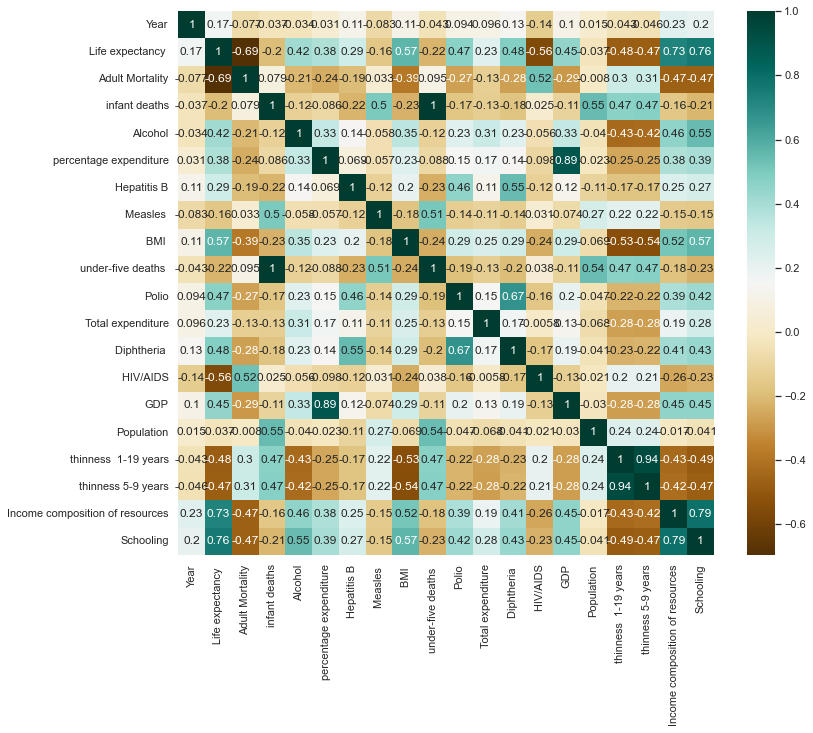

In [368]:
corr_matrix=new_data.corr()

plt.figure(1, figsize=(12,10))
sns.heatmap(corr_matrix, cmap='BrBG', annot=True)


corr_matrix = corr_matrix.drop('Life expectancy ')
corr_matrix['Life expectancy '].abs().sort_values(ascending=False)

In [369]:

#  correlation coefficients between all of the variables descending order
correlation =(new_data.corr().unstack().sort_values(ascending=False).drop_duplicates())

# convert correlation to dataframe
correlation = pd.DataFrame(correlation)

# print the correlation
print(tabulate(correlation, headers=['Correlation Coefficient'], tablefmt='psql'))

+---------------------------------------------------------------+---------------------------+
|                                                               |   Correlation Coefficient |
|---------------------------------------------------------------+---------------------------|
| ('Year', 'Year')                                              |                1          |
| ('under-five deaths ', 'infant deaths')                       |                0.99663    |
| (' thinness  1-19 years', ' thinness 5-9 years')              |                0.93921    |
| ('GDP', 'percentage expenditure')                             |                0.890083   |
| ('Schooling', 'Income composition of resources')              |                0.792929   |
| ('Schooling', 'Life expectancy ')                             |                0.760161   |
| ('Income composition of resources', 'Life expectancy ')       |                0.725851   |
| ('Polio', 'Diphtheria ')                                  

In [371]:
# add back country and status
new_data['Country'] = df['Country']
new_data['Status'] = df['Status']


                        Data Visualization

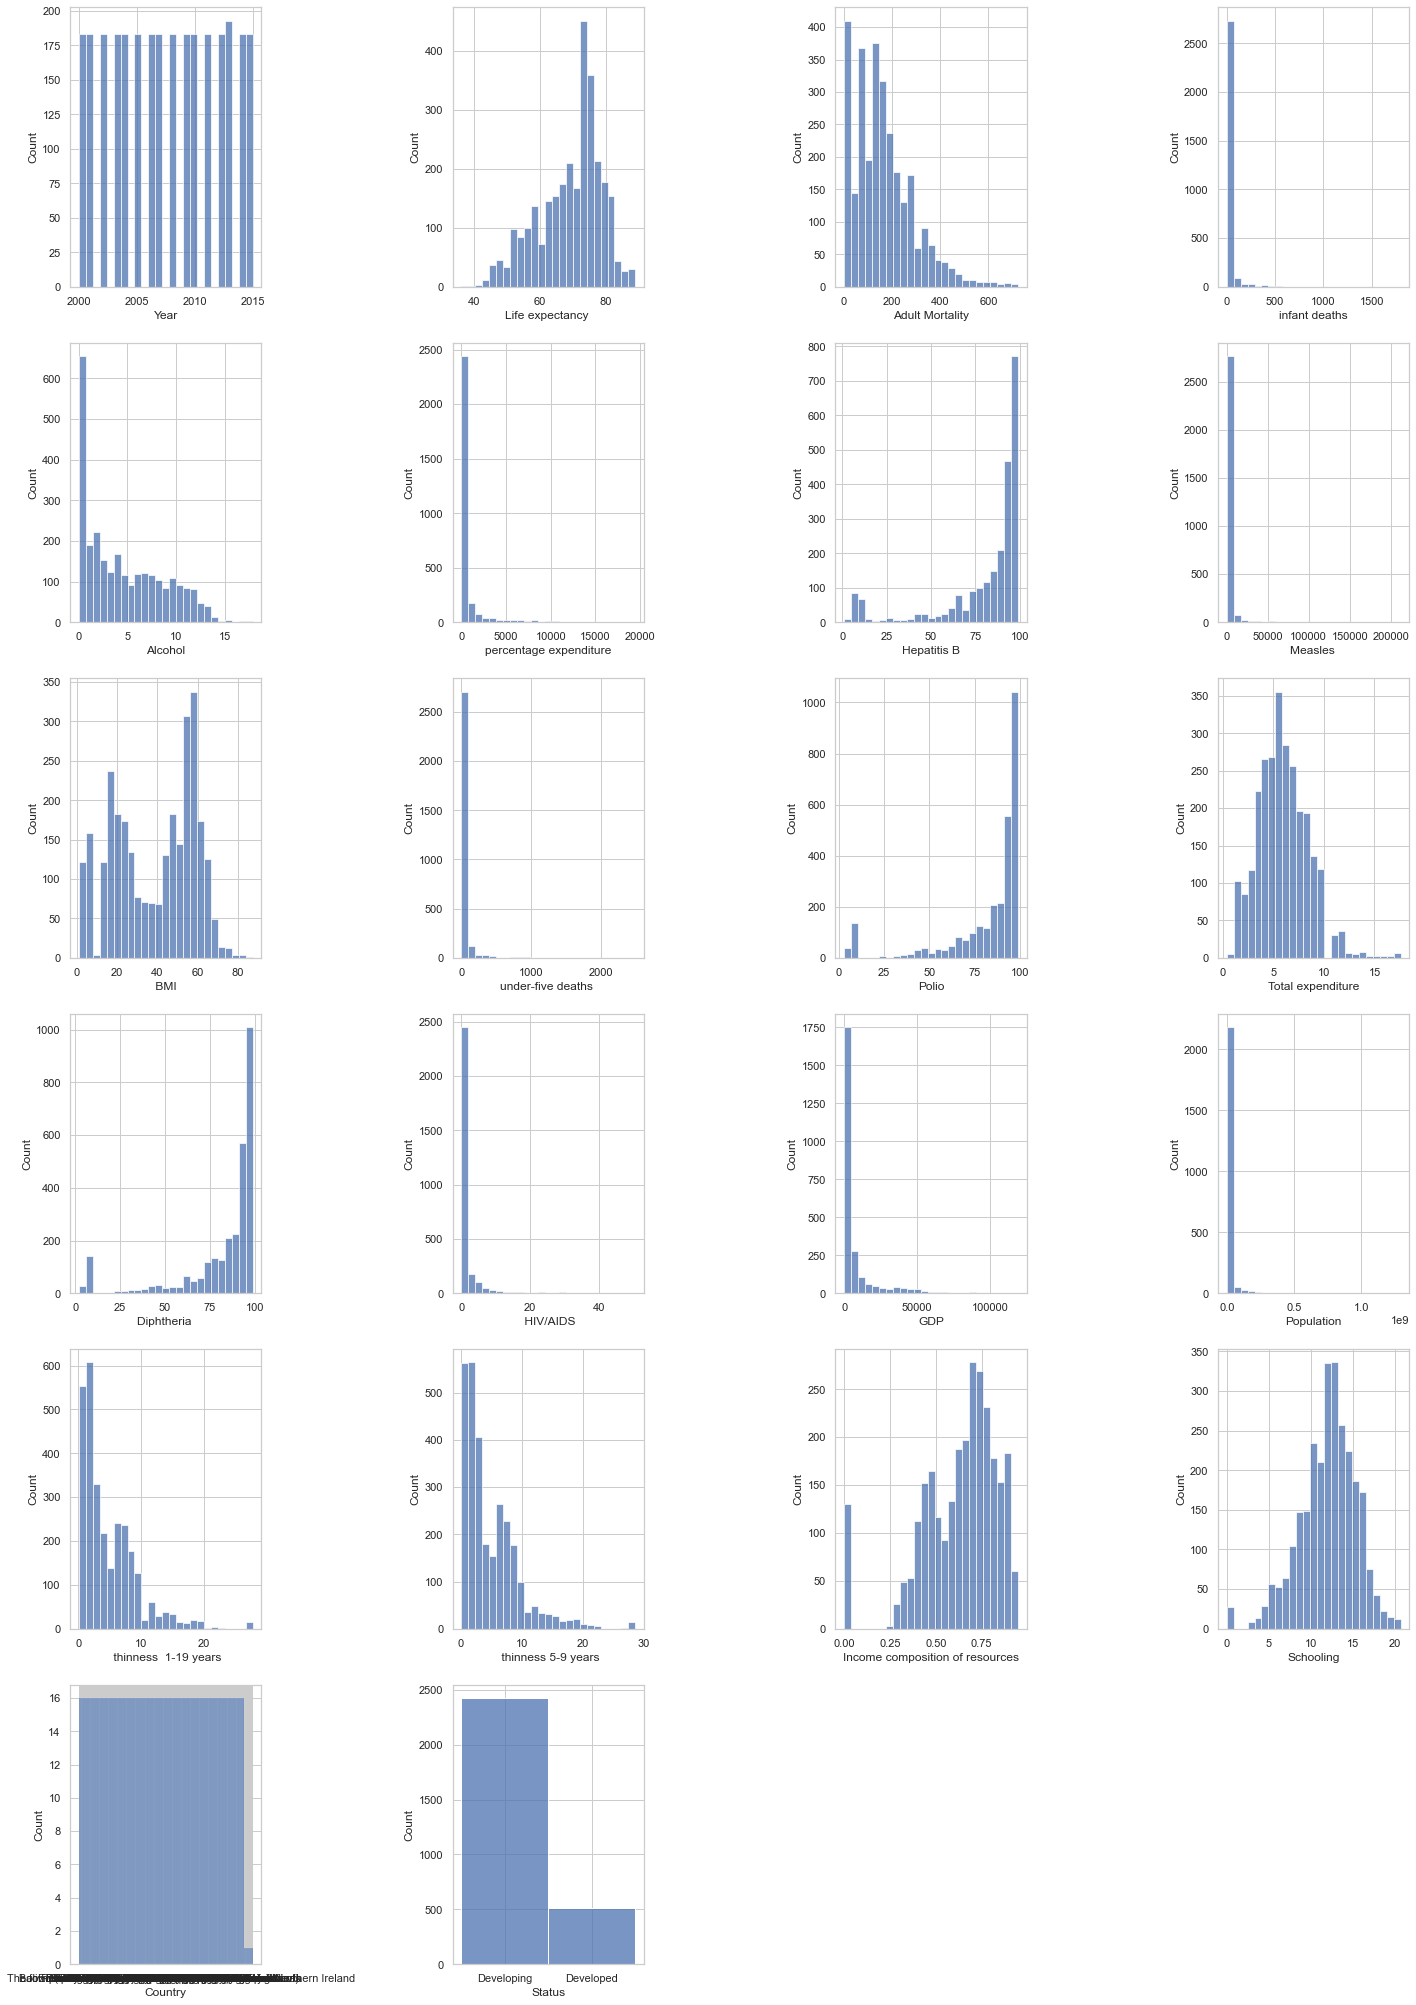

In [372]:
plt.figure(figsize=(24,36))
plt.subplots_adjust(wspace=1, hspace=None)

i = 1
for col_name in new_data:
    plt.subplot(6,4,i)
    sns.histplot(data = data[col_name],  bins = 25)
    i +=1

In [373]:
# divide the data set into developing and developed countries
developing = new_data[new_data['Status'] == 'Developing']
developed = new_data[new_data['Status'] == 'Developed']


schooling , BMI, hep, Polio, distratra and achole 

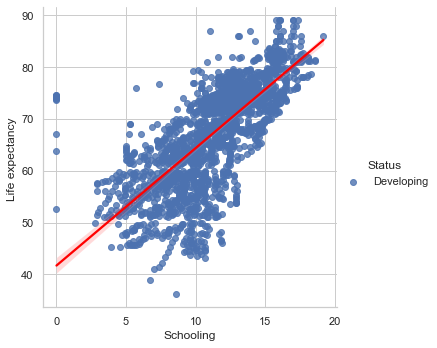

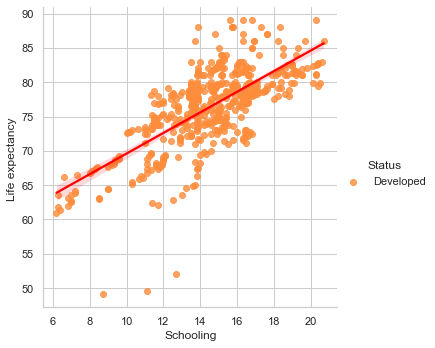

In [456]:
# what is the impact of schooling on life expectancy 

sns.lmplot(x='Schooling', y='Life expectancy ',hue='Status', data=developing,line_kws={'color': 'red'})
sns.lmplot(x='Schooling', y='Life expectancy ',hue='Status', data=developed, palette='Oranges',line_kws={'color': 'red'})





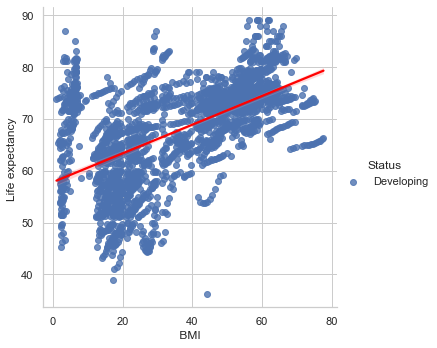

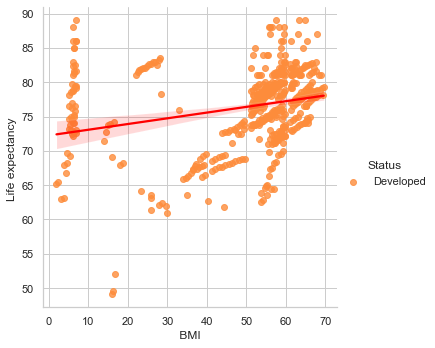

In [455]:
 # What is impact of BMI on developed and developing countries
sns.lmplot(x=' BMI ', y='Life expectancy ',hue='Status', data=developing,line_kws={'color': 'red'})
sns.lmplot(x=' BMI ', y='Life expectancy ',hue='Status', data=developed, palette='Oranges',line_kws={'color': 'red'})


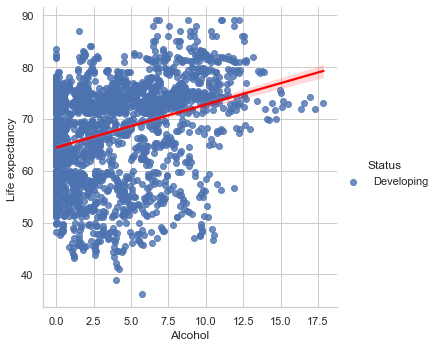

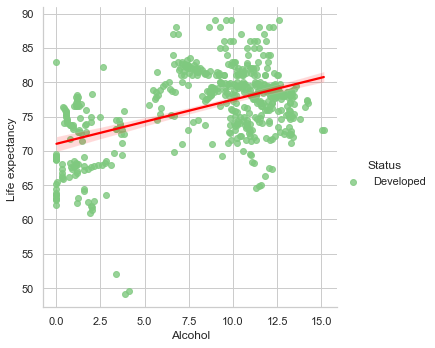

In [454]:
# what is impact of alcohol on life expectancy
sns.lmplot(x='Alcohol', y='Life expectancy ',hue='Status', data=developing,line_kws={'color': 'red'})
# create with green dots
sns.lmplot(x='Alcohol', y='Life expectancy ',hue='Status', data=developed,palette=('Accent'),line_kws={'color': 'red'})

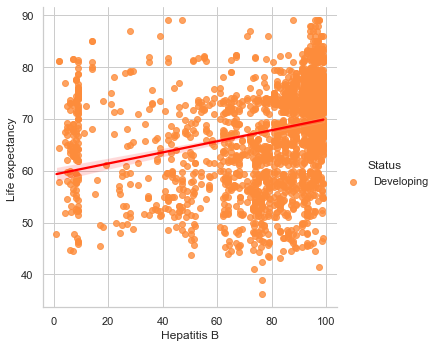

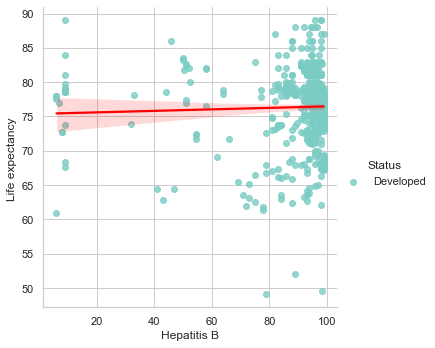

In [453]:
# what is the effect of Hepatitis B on life expectancy
sns.lmplot(x='Hepatitis B', y='Life expectancy ',hue='Status', data=developing,palette='Oranges',line_kws={'color': 'red'})
sns.lmplot(x='Hepatitis B', y='Life expectancy ',hue='Status', data=developed, palette='GnBu',line_kws={'color': 'red'})

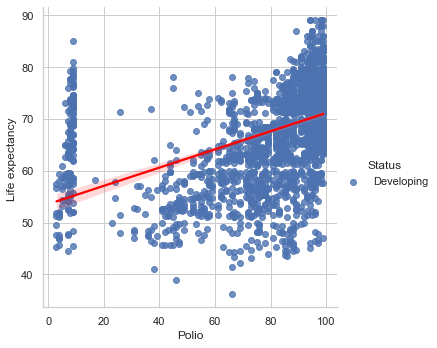

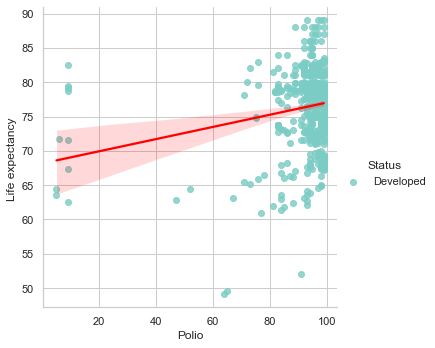

In [452]:
# what is the effect of Polio on life expectancy
sns.lmplot(x='Polio', y='Life expectancy ',hue='Status', data=developing,line_kws={'color': 'red'})
sns.lmplot(x='Polio', y='Life expectancy ',hue='Status', data=developed, palette='GnBu',line_kws={'color': 'red'})


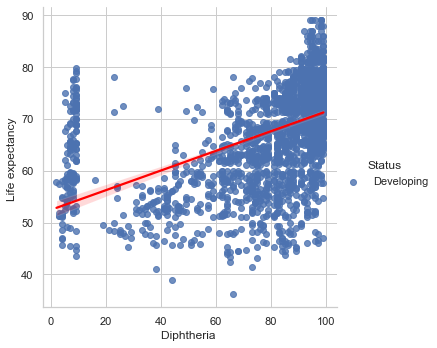

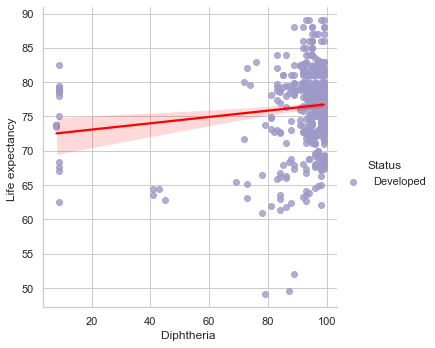

In [458]:
# what is the effect of Diphtheria on life expectancy
sns.lmplot(x='Diphtheria ', y='Life expectancy ',hue='Status', data=developing,line_kws={'color': 'red'})
sns.lmplot(x='Diphtheria ', y='Life expectancy ',hue='Status', data=developed, palette='Purples',line_kws={'color': 'red'})


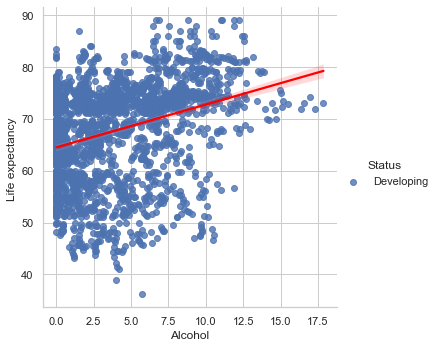

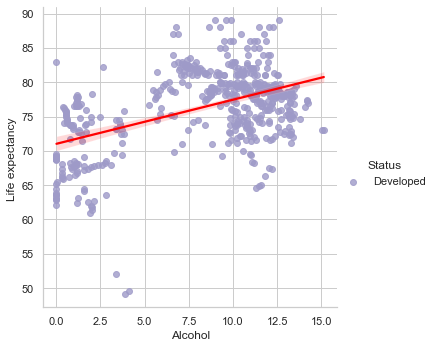

In [459]:
# what is the effect of Alcohol on life expectancy
sns.lmplot(x='Alcohol', y='Life expectancy ',hue='Status', data=developing,line_kws={'color': 'red'})
sns.lmplot(x='Alcohol', y='Life expectancy ',hue='Status', data=developed, palette='Purples',line_kws={'color': 'red'})


In [386]:
# show hearders for new_data
new_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country,Status
0,2015.00,65.00,263.00,62.00,0.01,71.28,65.00,1154.00,19.10,83.00,...,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Afghanistan,Developing
1,2014.00,59.90,271.00,64.00,0.01,73.52,62.00,492.00,18.60,86.00,...,62.00,0.10,612.70,327582.00,17.50,17.50,0.48,10.00,Afghanistan,Developing
2,2013.00,59.90,268.00,66.00,0.01,73.22,64.00,430.00,18.10,89.00,...,64.00,0.10,631.74,31731688.00,17.70,17.70,0.47,9.90,Afghanistan,Developing
3,2012.00,59.50,272.00,69.00,0.01,78.18,67.00,2787.00,17.60,93.00,...,67.00,0.10,669.96,3696958.00,17.90,18.00,0.46,9.80,Afghanistan,Developing
4,2011.00,59.20,275.00,71.00,0.01,7.10,68.00,3013.00,17.20,97.00,...,68.00,0.10,63.54,2978599.00,18.20,18.20,0.45,9.50,Afghanistan,Developing


In [409]:
# create regression analysis on immunisation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# create a new dataframe with only the variables we want to use
reg_data = new_data[['Year','Life expectancy ', 'Diphtheria ', 'Polio','Hepatitis B']]

In [473]:
# create OLS Regression
X = reg_data[['Diphtheria ', 'Polio','Hepatitis B']]
y = reg_data['Life expectancy ']

# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=465)

# fit the model
reg = LinearRegression()
reg.fit(X_train, y_train)

# predict the model
y_preds = reg.predict(X_test)


In [474]:
# print the coefficients
print('Coefficients: ', reg.coef_)
# print the intercept
print('Intercept: ', reg.intercept_)
# print the mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_preds))
# print the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_preds))
# print the equation for the model
print('Life expectancy = ', reg.intercept_, ' + ', reg.coef_[0], 'Diphtheria + ', reg.coef_[1], 'Polio + ', reg.coef_[2], 'Hepatitis B')

Coefficients:  [0.12104989 0.108312   0.00816453]
Intercept:  49.735460418200965
Mean squared error: 65.62
Coefficient of determination: 0.22
Life expectancy =  49.735460418200965  +  0.12104988573756194 Diphtheria +  0.10831199906585151 Polio +  0.008164532676095085 Hepatitis B


In [466]:
# print head for new_data
new_data.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country,Status
0,2015.00,65.00,263.00,62.00,0.01,71.28,65.00,1154.00,19.10,83.00,...,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10,Afghanistan,Developing
1,2014.00,59.90,271.00,64.00,0.01,73.52,62.00,492.00,18.60,86.00,...,62.00,0.10,612.70,327582.00,17.50,17.50,0.48,10.00,Afghanistan,Developing
2,2013.00,59.90,268.00,66.00,0.01,73.22,64.00,430.00,18.10,89.00,...,64.00,0.10,631.74,31731688.00,17.70,17.70,0.47,9.90,Afghanistan,Developing
3,2012.00,59.50,272.00,69.00,0.01,78.18,67.00,2787.00,17.60,93.00,...,67.00,0.10,669.96,3696958.00,17.90,18.00,0.46,9.80,Afghanistan,Developing
4,2011.00,59.20,275.00,71.00,0.01,7.10,68.00,3013.00,17.20,97.00,...,68.00,0.10,63.54,2978599.00,18.20,18.20,0.45,9.50,Afghanistan,Developing


In [470]:
# OLS regression
# create a new dataframe with only the variables we want to use
reg_data = new_data[['Year','Life expectancy ', 'Diphtheria ', 'Polio','Hepatitis B','Alcohol',' BMI ','Schooling']]
X = reg_data[['Diphtheria ', 'Polio','Hepatitis B','Alcohol',' BMI ','Schooling']]
y = reg_data['Life expectancy ']

# add model
model = sm.OLS(y,X).fit()

# print the summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          2.394e+04
Date:                Mon, 24 Apr 2023   Prob (F-statistic):                        0.00
Time:                        20:31:07   Log-Likelihood:                         -10780.
No. Observations:                2909   AIC:                                  2.157e+04
Df Residuals:                    2903   BIC:                                  2.161e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------